## การตรวจจับขอบ (Edge Detection)
### 1. บทนำ 

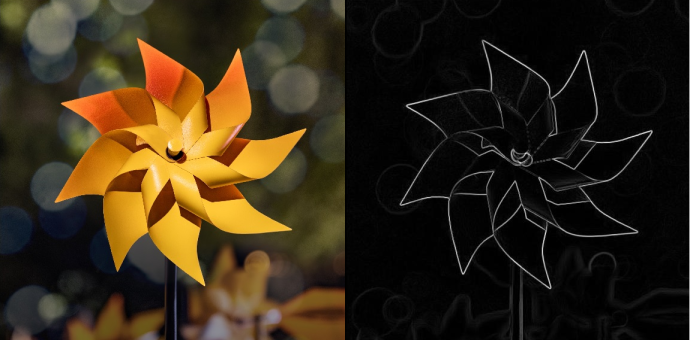

**การตรวจจับขอบ** เป็นเทคนิคพื้นฐานในการประมวลผลภาพและการมองเห็นของคอมพิวเตอร์ ใช้เพื่อระบุจุดในภาพที่ความสว่างของสีเปลี่ยนแปลงอย่างชัดเจน มีการใช้งานหลักในการดึงข้อมูลโครงสร้างจากภาพ และเป็นเครื่องมือสำคัญในแอปพลิเคชันต่างๆ เช่น การจดจำวัตถุ การแบ่งส่วนภาพ และการตรวจจับคุณลักษณะ นี่คือบทเรียนพื้นฐานที่ครอบคลุมแนวคิดและวิธีการหลักสำหรับการตรวจจับขอบ
### 2. ความเข้าใจเกี่ยวกับการตรวจจับขอบ
- **คำจำกัดความ:** ขอบในภาพคือการเปลี่ยนแปลงเฉพาะที่ที่สำคัญในความเข้มของภาพ มักเกี่ยวข้องกับความไม่ต่อเนื่องในความเข้มของภาพหรืออนุพันธ์อันดับแรกของความเข้มของภาพ
- **ความสำคัญ:** การตรวจจับขอบมีความสำคัญต่อการวิเคราะห์ภาพ โดยเฉพาะในแอปพลิเคชันที่เกี่ยวข้องกับการตรวจจับรูปร่าง
### 3. แนวคิดพื้นฐาน
- **ความชัน (Gradient):** การวัดการเปลี่ยนแปลงความสว่างในชุดของพิกเซล เป็นเวกเตอร์ที่ประกอบด้วยทิศทางและขนาดของการเปลี่ยนแปลงที่สำคัญที่สุด

<span style="color:yellow;">**รูปที่ 2 ที่เป็นหลุมมันเป็น Intensity ของเส้นที่รูปแรกที่ผ่านรูป**</span>

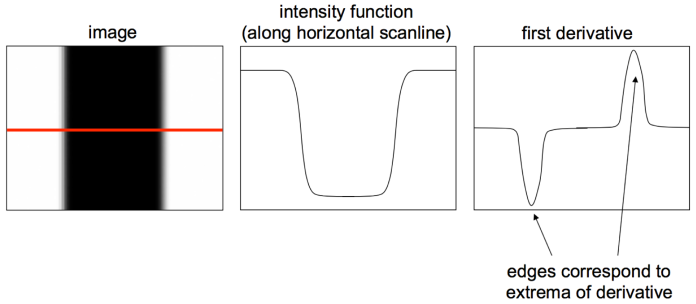

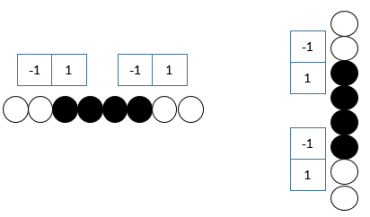    

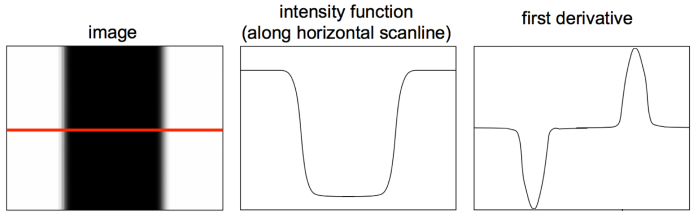

>- **Roberts (Roberts Cross Operator):** คือตัวดำเนินการสำหรับการตรวจจับขอบ 
>เป็นวิธีพื้นฐานและเก่าแก่ ใช้ mask ขนาด 2×2 เพื่อคำนวณความแตกต่างของพิกเซลในแนวทแยง

>    ลักษณะเฉพาะ:
>    - ใช้เคอร์เนลขนาด 2×2 (เล็กกว่า Sobel และ Prewitt ที่เป็น 3×3)
>    - ตรวจจับขอบในแนวทแยง (diagonal) ได้ดีเร็ว ประมวลผลน้อยกว่า แต่ ไวต่อสัญญาณรบกวน มากกว่า
>    - เหมาะสำหรับภาพที่มีคุณภาพดี
>    เคอร์เนล Roberts:

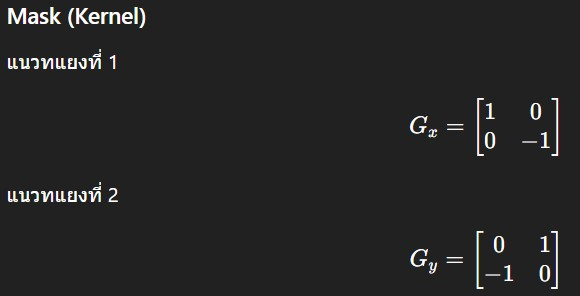

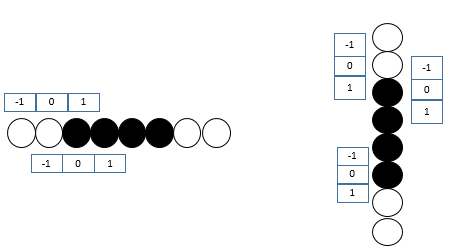

>- **ตัวดำเนินการ Prewitt (Prewitt Operator):** วิธีการที่นิยมในการประมาณค่าความชันของฟังก์ชันความเข้มของภาพ

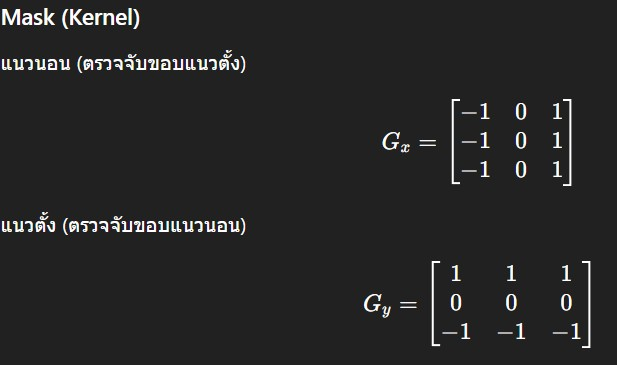

>- **ตัวดำเนินการ Sobel (Sobel Operator):** วิธีการที่นิยมในการประมาณค่าความชันของฟังก์ชันความเข้มของภาพ

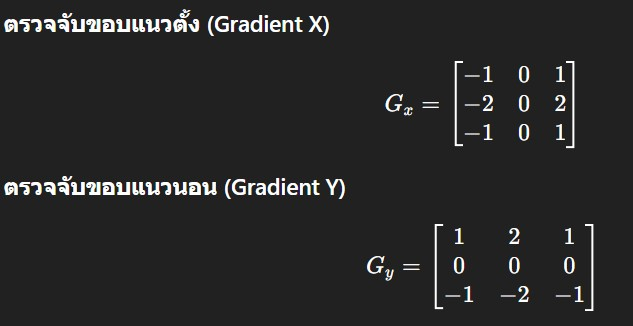

>- **ตัวตรวจจับขอบ Canny (Canny Edge Detector):** อัลกอริทึมแบบหลายขั้นตอนที่ตรวจจับขอบที่หลากหลายในภาพ

### ตารางเปรียบเทียบตัวดำเนินการตรวจจับขอบ

| คุณสมบัติ | Roberts | Prewitt | Sobel |
|---------|---------|---------|-------|
| **ขนาดเคอร์เนล** | 2×2 | 3×3 | 3×3 |
| **ความเร็ว** | เร็วที่สุด ⚡ | ปานกลาง | ปานกลาง |
| **ความอ่อนไหว** | สูงต่อสัญญาณรบกวน | ต่ำกว่า Roberts | ต่ำกว่า Roberts |
| **การตรวจจับขอบทแยง** | ดีที่สุด | ปานกลาง | ปานกลาง |
| **การประมาณ Gradient** | เรียบง่าย | ดี | ดี |
| **น้ำหนักจากศูนย์กลาง** | ไม่มี | มี | มี |
| **ประสิทธิภาพ** | ต่ำ | สูง | สูงที่สุด |
| **ใช้ในงาน** | งานเร็ว ภาพสะอาด | งานทั่วไป | งานทั่วไป (ได้รับความนิยม) |
| **ข้อดี** | - เร็ว<br>- ตรวจจับขอบทแยงดี | - สมดุล<br>- มีความเสถียร | - ผลลัพธ์ดี<br>- ประเมินทั้ง x, y |
| **ข้อเสีย** | - ไวต่อสัญญาณรบกวน<br>- ผลลัพธ์หยาบ | - เร็วกว่า Sobel | - ประมวลผลมากกว่า |
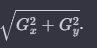
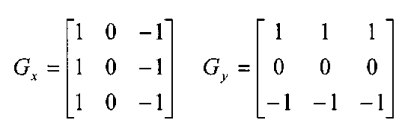
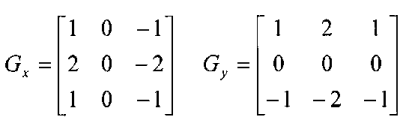

## วิธีทำ
1. หา Gx, Gy ด้วยวิธีใดก็ได้
2. เข้าสูตร

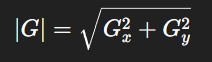

- เอา ```Gx, Gy ^2```เพื่อให้เป็นค่า + ทั้งคู่ เพราะความเปลี่ยนแปลงอาจเป็นค่าลบได้
- เอา ```Gx^2 + Gy^2```
- สุดท้ายคือเอาไปถอดรูท

## Step code
1. เลือก Operator -> จะได้ filter
2. เอา filter ไปหา sub img 

>**เส้นของภาพจะเป็นสีขาว ที่เหลือจะเป็นสีดำ**

### นำเข้าโมดูล

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

### โมดูลแสดงผลภาพ

In [21]:
def plt_show(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

In [22]:
def cv_show(img):
    cv2.imshow('Mean Filtered Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

#### ตัวดำเนินการ Prewitt
- **หลักการ:** ใช้การม้วนรวม (convolution) กับเคอร์เนล Sobel เพื่อคำนวณขนาดของความชันที่แต่ละพิกเซล
- **การใช้งาน:** ทำการม้วนรวมภาพกับคู่ของเคอร์เนล 3x3 (หนึ่งอันประมาณการความชันในทิศทาง x และอีกอันหนึ่งในทิศทาง y) ขนาดของความชันคำนวณโดยใช้สูตร:

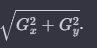

In [23]:
#เป็นการคำนวณหาค่าขอบโดยใช้สูตรของ Prewitt
def prewitt_operator_meth(img):
    mask_gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype='float16') 
    mask_gy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype='float16')
    gx = cv2.filter2D(img, -1, mask_gx)
    gy = cv2.filter2D(img, -1,  mask_gy)    
    out = np.sqrt(gx**2 + gy**2) 
    return out

In [24]:
#เป็นการคำนวณหาค่าขอบโดยใช้สูตรของ Roberts, Sobel, และ Prewitt
#เป็นการเขียนเอง
def edge_operator_meth(img, k):
    f = img.copy().astype(np.float16)
    out = np.zeros_like(img, dtype = 'float16')
    #ถ้า k=1 จะเป็น Prewitt, k=2 จะเป็น Sobel, k=sqrt(2) จะเป็น Roberts
    mask_gx = np.array([[-1, 0, 1], [-k, 0, k], [-1, 0, 1]] , dtype = 'float16') 
    mask_gy = np.array([[-1, -k, -1], [0, 0, 0], [1, k, 1]] , dtype = 'float16') 
 
    sz, sz = mask_gx.shape
    bd = sz // 2
    (m,n) = f.shape
    for i in range(bd,m-bd):
        for j in range(bd,n-bd):
            gx, gy = 0., 0.
            sub_f = f[i - bd : i + bd + 1, j - bd : j + bd + 1]
            gx = np.multiply(sub_f, mask_gx).sum() 
            gy = np.multiply(sub_f, mask_gy).sum()    
            out[i,j] = np.sqrt(gx**2 + gy**2)
    out[out>255.0] = 255.0
    return out.astype(np.uint8)

### 1. อ่านภาพ

In [25]:
image = cv2.imread('./images/alphabet.jpg',1)
print(image.shape)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray.shape)

(633, 740, 3)
(633, 740)


In [26]:
#out = prewitt_operator_meth(gray)
#print(np.amax(out))
#out = (out/np.amax(out))*255
#out = out.astype(np.uint8)
out = edge_operator_meth(gray, 1) #ใช้ Prewitt เพราะให้ k=1
imgs = cv2.hconcat([gray, out])
cv_show(imgs)
#plt_show(imgs)


C:\Users\Admin\AppData\Local\Temp\ipykernel_14620\1804915387.py:19: RuntimeWarning: overflow encountered in scalar power
  out[i,j] = np.sqrt(gx**2 + gy**2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14620\1804915387.py:19: RuntimeWarning: overflow encountered in scalar add
  out[i,j] = np.sqrt(gx**2 + gy**2)


#### ตัวดำเนินการ Sobel

In [27]:
def sobel_operator(img):
    gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  
    gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  
    out = np.sqrt(gx**2 + gy**2)
    return out.astype(np.uint8)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14620\1804915387.py:19: RuntimeWarning: overflow encountered in scalar power
  out[i,j] = np.sqrt(gx**2 + gy**2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14620\1804915387.py:19: RuntimeWarning: overflow encountered in scalar add
  out[i,j] = np.sqrt(gx**2 + gy**2)


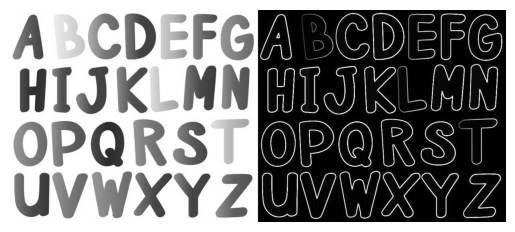

In [28]:
#out = sobel_operator(gray)
out2 = edge_operator_meth(gray, 2)
imgs = cv2.hconcat([gray, out2])
plt_show(imgs)

#### ตัวดำเนินการ Canny

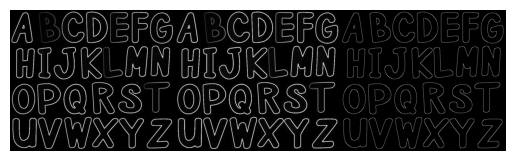

In [29]:
out3  = cv2.Canny(gray, 50, 150)
imgs = cv2.hconcat([out,out2, out3])
plt_show(imgs)